In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

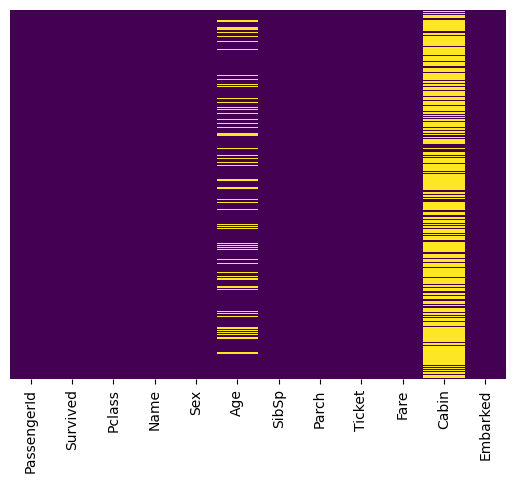

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

#Drawing a heatmap with the null function to find out the missing data ,each yellow line represents null value which means the data is missing in that position

In [9]:
#creating more plots to do some exploratory data analysis

sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

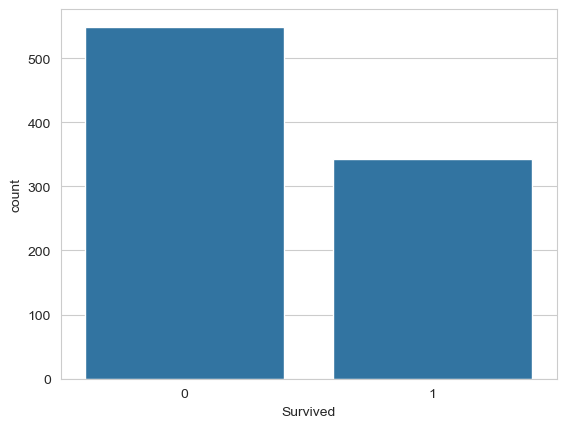

In [11]:
sns.countplot(x='Survived',data = train) #less survivers than deaths

<Axes: xlabel='Survived', ylabel='count'>

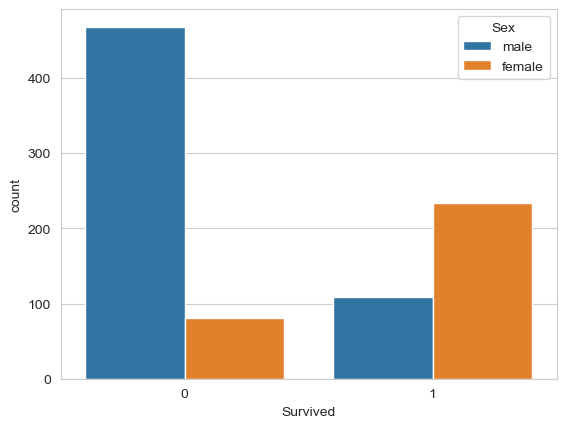

In [13]:
sns.countplot(x='Survived',hue='Sex',data = train) #more female survivers

<Axes: xlabel='Survived', ylabel='count'>

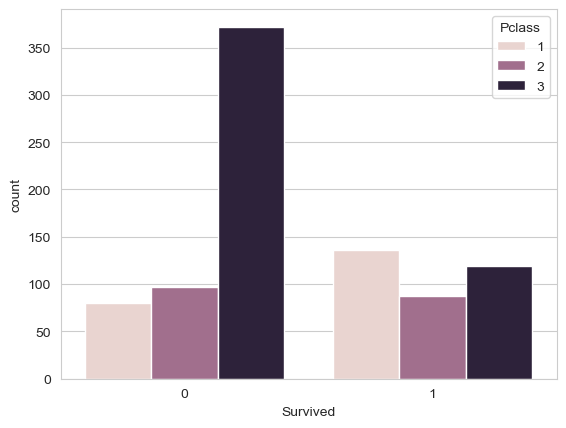

In [14]:
sns.countplot(x='Survived',hue='Pclass',data = train) #more survivers in the 1st class

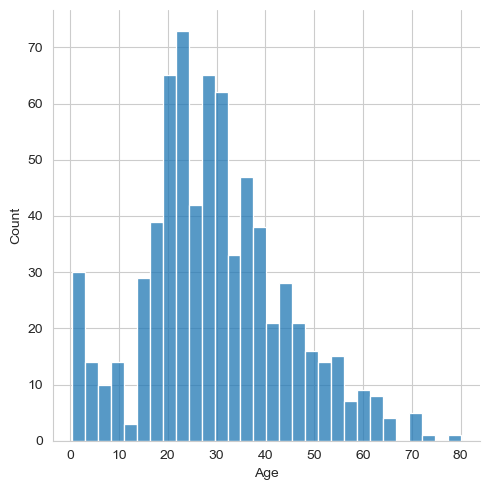

In [16]:
sns.displot(train['Age'].dropna(),kde=False,bins=30) #avg age is 20-30

<Axes: xlabel='SibSp', ylabel='count'>

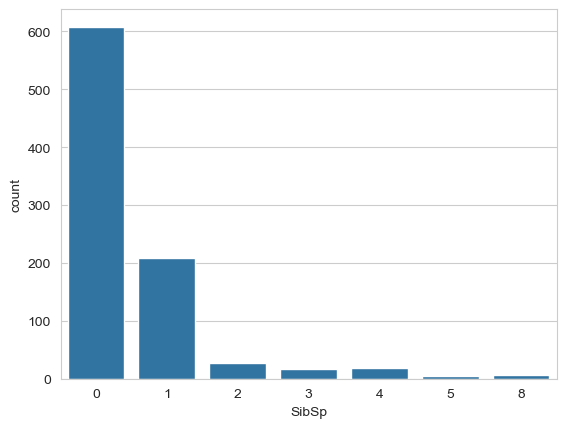

In [18]:
sns.countplot(x='SibSp',data = train) #more number of singles

<Axes: >

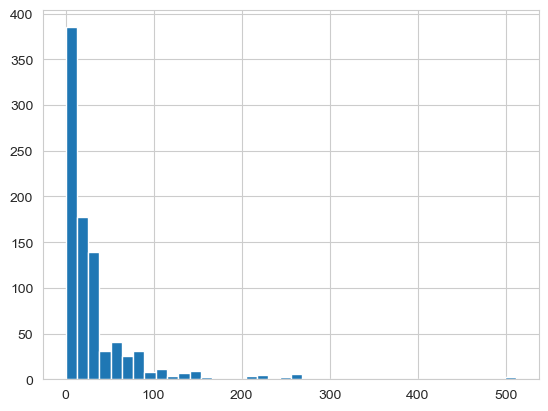

In [19]:
train['Fare'].hist(bins=40) #higher number of people have cheaper tickets

<Axes: xlabel='Pclass', ylabel='Age'>

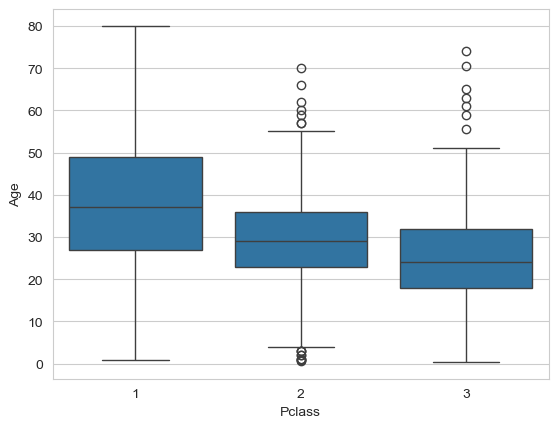

In [21]:
sns.boxplot(x='Pclass',y='Age',data= train) 

#people is 1st class are older in age  average is 37 

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

     if Pclass ==1:
         return 37

     elif Pclass ==2:
         return 29

     else :
         return 24

    else :
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\thaku\AppData\Local\Temp\ipykernel_44676\2651448835.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\thaku\AppData\Local\Temp\ipykernel_44676\2651448835.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

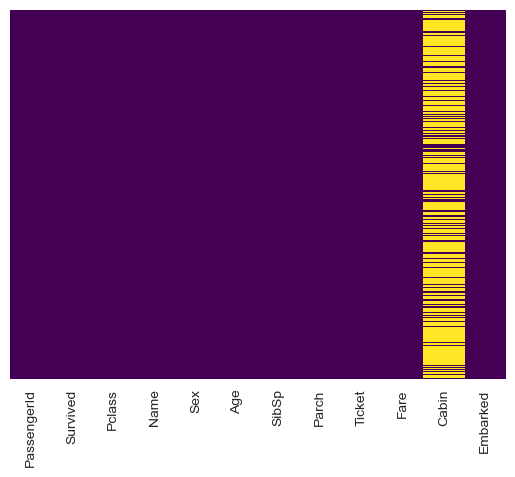

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [30]:
#better to drop the cabin coloumn as it has too much missing info
train.drop('Cabin', axis=1,inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
train.dropna(inplace=True)

<Axes: >

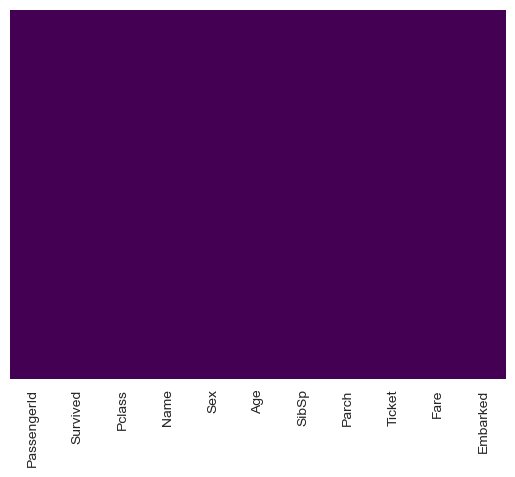

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [39]:
#nothing is missing now and that data has been cleaned

In [41]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [43]:
embark= pd.get_dummies(train['Embarked'],drop_first=True)

In [45]:
train = pd.concat([train,sex,embark],axis=1)

In [47]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [52]:
#removed the columns which will not be needed in the machine learning algorithm

In [54]:
X = train.drop('Survived',axis =1)
y = train['Survived']

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression(max_iter=200)

In [70]:
logmodel.fit(X_train,y_train)

C:\Users\thaku\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [72]:
predictions = logmodel.predict(X_test)

In [74]:
#Evalutaing our model below

from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.65      0.72       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [78]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 36,  68]], dtype=int64)